In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


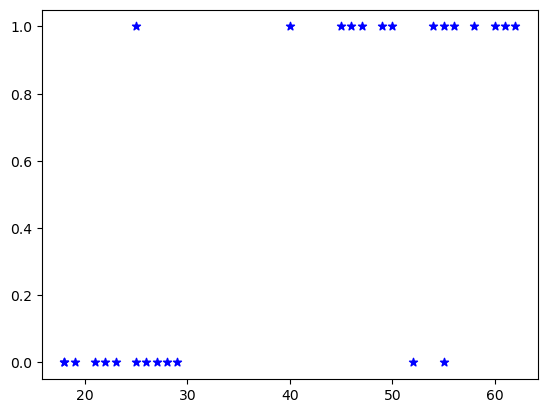

In [6]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='blue')

In [7]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.7)


In [20]:

X_test

,age
9,61
13,29
24,50
14,49
1,25
18,19
26,23
7,60
22,40


In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [22]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [23]:
X_test

,age
9,61
13,29
24,50
14,49
1,25
18,19
26,23
7,60
22,40


In [24]:
y_predicted = logreg.predict(X_test)

In [25]:
y_predicted

array([1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [26]:
logreg.predict_proba(X_test)

array([[0.09891996, 0.90108004],
       [0.7654783 , 0.2345217 ],
       [0.26053263, 0.73946737],
       [0.28146736, 0.71853264],
       [0.83299199, 0.16700801],
       [0.90404731, 0.09595269],
       [0.86044573, 0.13955427],
       [0.10877885, 0.89122115],
       [0.50421782, 0.49578218]])

In [28]:
logreg.score(X_test,y_test)

0.8888888888888888

In [29]:
y_predicted

array([1, 0, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [30]:
X_test

,age
9,61
13,29
24,50
14,49
1,25
18,19
26,23
7,60
22,40


In [31]:
logreg.coef_

array([[0.10600737]])

In [32]:
logreg.intercept_

array([-4.25716651])

In [33]:
import math
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [34]:
def prediction_function(age):
    z = 0.042 * age - 1.53  # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [36]:
age = 3
prediction_function(age)

0.1971821390017604

In [37]:
age = 44
prediction_function(age)

0.5788367596452483

In [38]:
#CONFUSION MATRIX

In [54]:
import seaborn as sns
import skimpy as sk
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler

In [52]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
%pip install skimpy

  Obtaining dependency information for skimpy from https://files.pythonhosted.org/packages/15/b7/6f154821cfbf5c36d042dbde5ab853cda2a57827d53a9fe09d54bde5b7da/skimpy-0.0.14-py3-none-any.whl.metadata
  Using cached skimpy-0.0.14-py3-none-any.whl.metadata (28 kB)
  Obtaining dependency information for click<9.0.0,>=8.1.6 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for polars<0.21,>=0.19 from https://files.pythonhosted.org/packages/05/3e/f3040078ea4b7c26f24abda1e087896c5136a0985890048946337cb15c66/polars-0.20.6-cp38-abi3-win_amd64.whl.metadata
  Using cached polars-0.20.6-cp38-abi3-win_amd64.whl.metadata (15 kB)
  Obtaining dependency information for quartodoc<0.8.0,>=0.7.2 from https://files.pythonhosted.org/packages/c1/cb/4fee7ac58adc1eb4a4bf1978f109a2669172a1a5ac2236ab22405e915000/quarto

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-lsp-black 1.2.1 requires black>=22.3.0, but you have black 0.0 which is incompatible.


In [55]:
pip show skimpy

Name: skimpyNote: you may need to restart the kernel to use updated packages.

Version: 0.0.14
Summary: skimpy
Home-page: https://aeturrell.github.io/skimpy/
Author: Arthur Turrell
Author-email: 
License: MIT
Location: C:\Users\ASL\anaconda3\Lib\site-packages
Requires: click, ipykernel, numpy, pandas, polars, pyarrow, Pygments, quartodoc, rich, typeguard
Required-by: 


In [48]:
df.describe

<bound method NDFrame.describe of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult

In [53]:
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 891    │ │ string      │ 5     │ │ class                 │                                │
│ │ Number of columns │ 15     │ │ int32       │ 4     │ │ deck                  │                                │
│ └───────────────────┴────────┘ │ float64     │ 2     │ └───────────────────────┘                                │
│                                │ category    │ 2     │                                                          │
│                                │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %     ┃ mean    ┃ sd     ┃ p0     ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ survived         │     0 │        0 │    0.38 │   0.49 │      0 │     0 │     0 │     1 │      1 │ ▇    ▅  │  │
│ │ pclass           │     0 │        0 │     2.3 │   0.84 │      1 │     2 │     3 │     3 │      3 │ ▃  ▃ ▇  │  │
│ │ age              │   177 │    19.87 │      30 │     15 │   0.42 │    20 │    28 │    38 │     80 │  ▂▇▇▃▁  │  │
│ │ sibsp            │     0 │        0 │    0.52 │    1.1 │      0 │     0 │     0 │     1 │      8 │    ▇    │  │
│ │ parch            │     0 │        0 │    0.38 │   0.81 │      0 │     0 │     0 │     0 │      6 │   ▇▁▁   │  │
│ │ fare             │     0 │        0 │      32 │     50 │      0 │   7.9 │    14 │    31 │    510 │    ▇    │  │
│ └──────────────────┴───────┴──────────┴─────────┴────────┴────────┴───────┴───────┴───────┴────────┴─────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA          ┃ NA %            ┃ ordered              ┃ unique            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ class                           │           0 │               0 │ False                │                 3 │  │
│ │ deck                            │         688 │           77.22 │ False                │                 8 │  │
│ └─────────────────────────────────┴─────────────┴─────────────────┴──────────────────────┴───────────────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ adult_male                         │             537 │                           0.6 │       ▅    ▇        │  │
│ │ alone                              │             537

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [60]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [62]:
df.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [63]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [64]:
df.drop('deck', axis=1, inplace=True)

In [65]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [66]:
df['fare'].fillna(df['fare'].mean(), inplace=True)

In [68]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [69]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

In [71]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()        

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [72]:
X = df.drop('survived', axis=1)
y = df['survived']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
model = LogisticRegression()

In [75]:
model.fit(X_train, y_train)

C:\Users\ASL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred = model.predict(X_test)

In [77]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  1.0
Recall Score:  1.0
Precision Score:  1.0
F1 Score:  1.0
Confusion Matrix: 
 [[112   0]
 [  0  67]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00        67

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

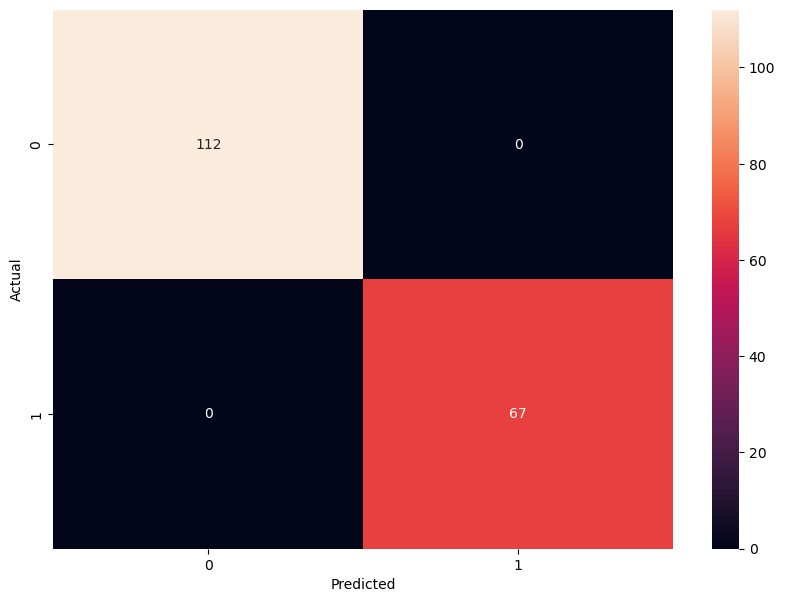

In [78]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')